# How can you improve the value of your home?

The goal of this project is to examine how an existing homeowner can improve the value of their home. Using King County, WA sales data from 2014-15, I will determine which features are most valuable.

In [970]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df = pd.read_csv('kc_house_data.csv')
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Let's examine the columns:

In [971]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Let's create a 'Month' columns:

In [972]:
df['Month'] = pd.DatetimeIndex(df['date']).month 
df['Month']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: Month, Length: 21597, dtype: int64

In [973]:
df['Month'].value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: Month, dtype: int64

Eliminating irrelevant columns:

In [974]:
relevant_columns = ['price', 'bedrooms', 'bathrooms','sqft_living', 'floors', 'condition','yr_renovated','Month', 'grade']
                    
df = df.loc[:, relevant_columns]
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7 Average
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7 Average
2,180000.0,2,1.00,770,1.0,Average,NaN,2,6 Low Average
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7 Average
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8 Good
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8 Good
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8 Good
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7 Average
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8 Good


Correlation Heat Map:

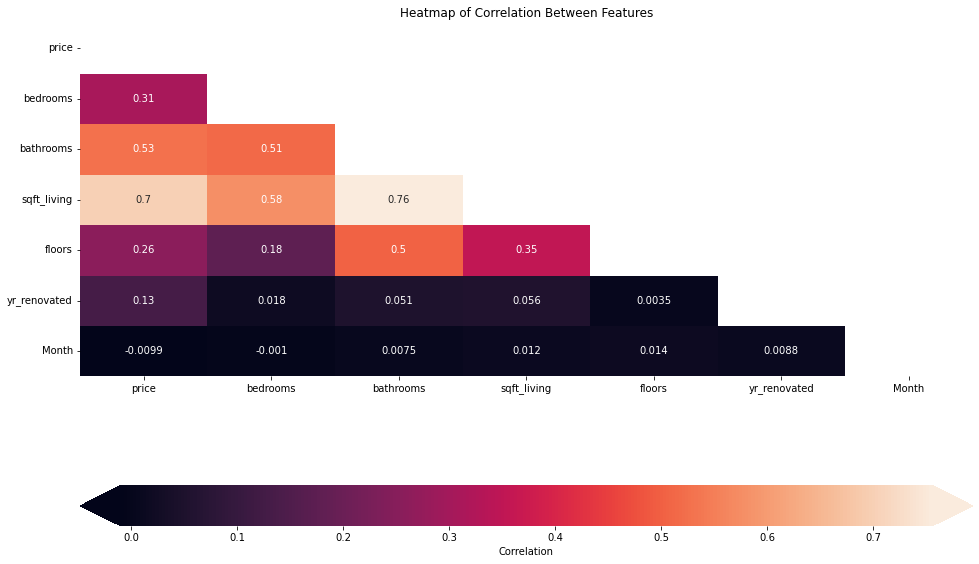

In [975]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(
    data=df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)
ax.set_title("Heatmap of Correlation Between Features");

'Sqft_Living' has the highest correlation with 'price'. Let's look at scatter plots and histograms to check the linearity and whether each variable is uniformly distributed.

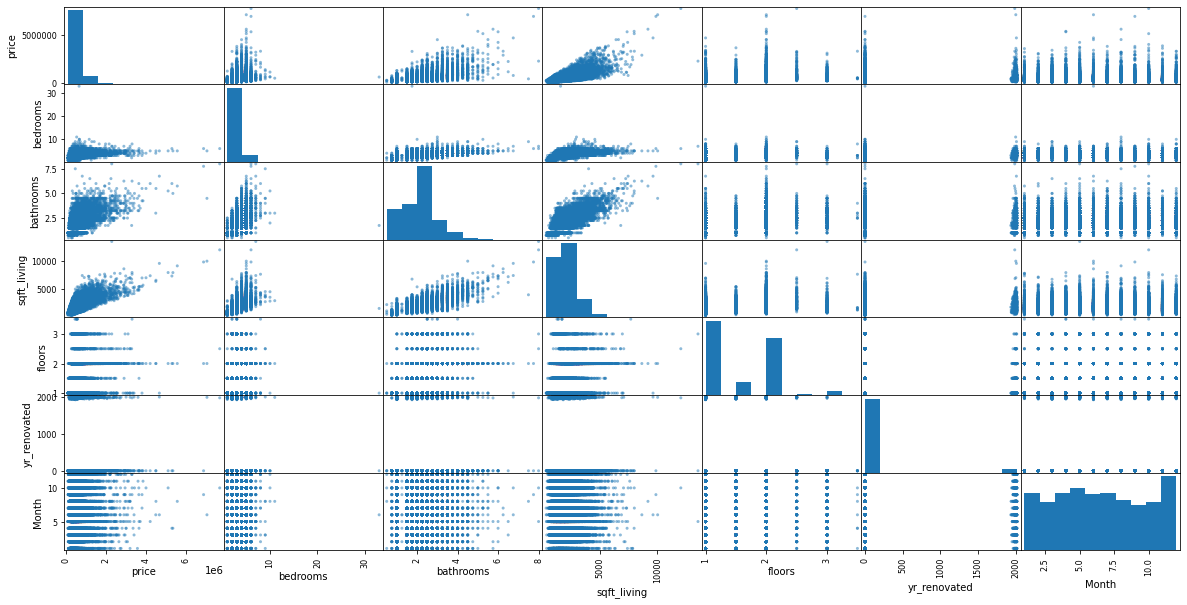

In [976]:
pd.plotting.scatter_matrix(df[df.columns], figsize=(20,10));

Let's take a closer look at 'sqft_living' and price:

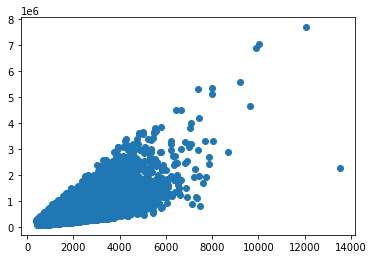

In [977]:
plt.scatter(df.sqft_living, df.price)

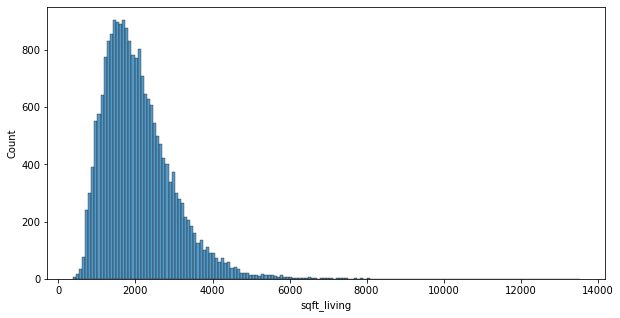

In [978]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['sqft_living']);

The relationship is certainly linear but it isn't normally distributed. Let's look at the distributions of some of the other variables.

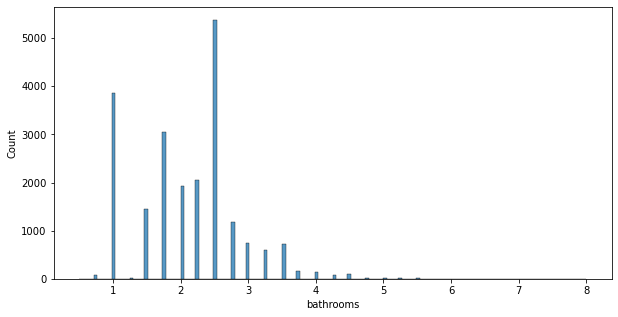

In [979]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['bathrooms']);

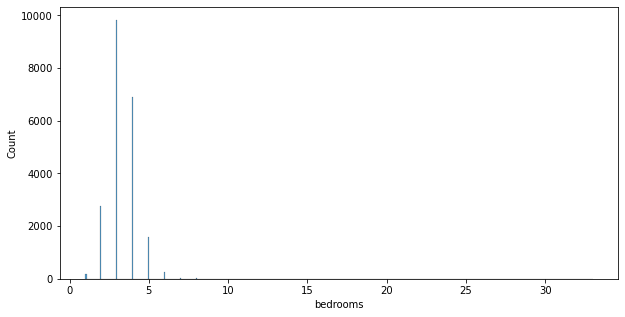

In [980]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['bedrooms']);

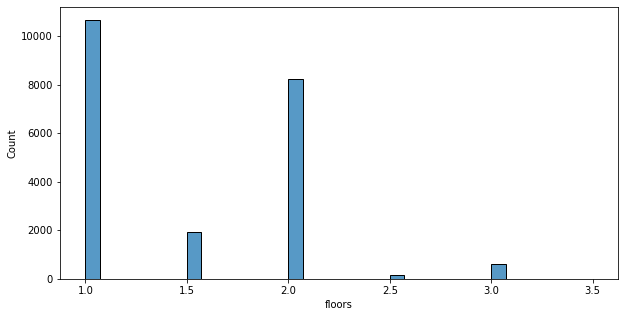

In [981]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['floors']);

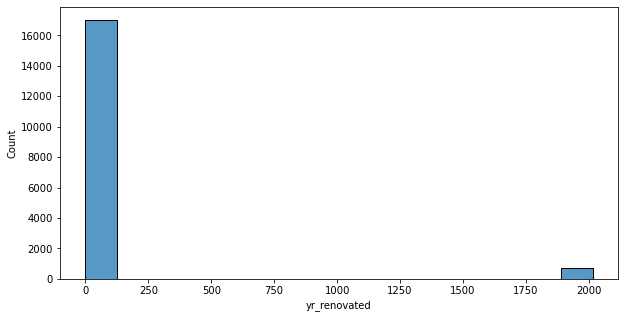

In [982]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['yr_renovated']);

Ok, so it looks like it's best to use 'sqft_living' for our independent variable. So, let's do it:

In [983]:
X_baseline= df['sqft_living']
y_baseline= df['price']
X_baseline

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

In [984]:
X_baseline= sm.add_constant(X_baseline)

baseline_model=sm.OLS(endog=y_baseline, exog=X_baseline).fit()

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [985]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        13:02:17   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


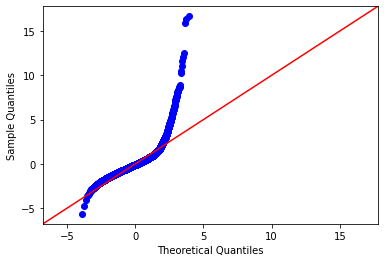

In [986]:
residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45',)
plt.show()

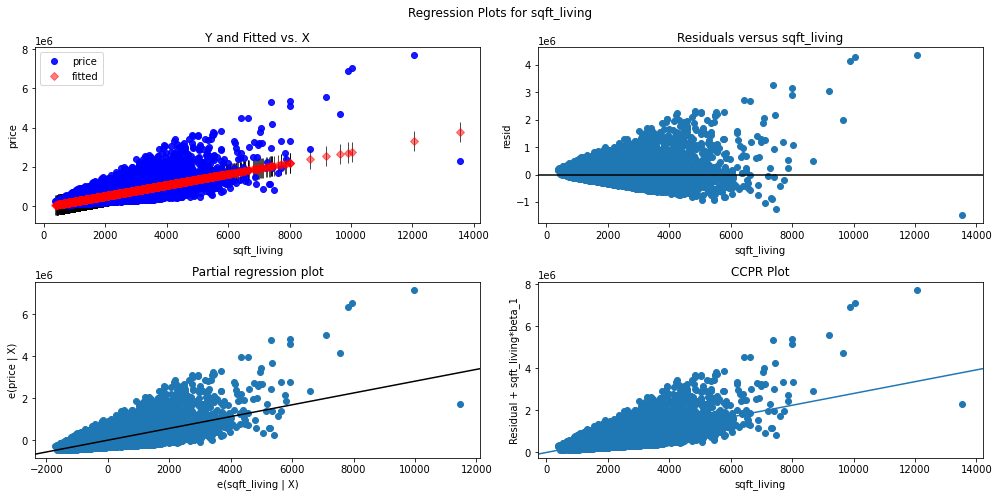

In [987]:
sm.graphics.plot_regress_exog(baseline_model, 'sqft_living', fig=plt.figure(figsize=(14,7)));

Ok, it really isn't a great fit at all and the residuals are not homoscedastic. ***Let's improve by adding more features.***

# Data Preparation ,Cleaning, and Preprocessing

So, before we add more features, let's get it ready for processing.

In [988]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   floors        21597 non-null  float64
 5   condition     21597 non-null  object 
 6   yr_renovated  17755 non-null  float64
 7   Month         21597 non-null  int64  
 8   grade         21597 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 1.5+ MB


Fill in null values for 'yr_renovated'. 0 is actually the mode of this column so it's a good pick.

In [989]:
df['yr_renovated'].fillna(0.0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   floors        21597 non-null  float64
 5   condition     21597 non-null  object 
 6   yr_renovated  21597 non-null  float64
 7   Month         21597 non-null  int64  
 8   grade         21597 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 1.5+ MB


In [990]:
df['yr_renovated'].isna().value_counts()


False    21597
Name: yr_renovated, dtype: int64

In [991]:
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7 Average
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7 Average
2,180000.0,2,1.00,770,1.0,Average,0.0,2,6 Low Average
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7 Average
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8 Good
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8 Good
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8 Good
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7 Average
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8 Good


Let's make a  model with only numeric features:

In [992]:
Numeric= df.drop(['condition','Month', 'grade'], axis=1)

In [993]:
Numeric

,price,bedrooms,bathrooms,sqft_living,floors,yr_renovated
0,221900.0,3,1.00,1180,1.0,0.0
1,538000.0,3,2.25,2570,2.0,1991.0
2,180000.0,2,1.00,770,1.0,0.0
3,604000.0,4,3.00,1960,1.0,0.0
4,510000.0,3,2.00,1680,1.0,0.0
...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,0.0
21593,400000.0,4,2.50,2310,2.0,0.0
21594,402101.0,2,0.75,1020,2.0,0.0
21595,400000.0,3,2.50,1600,2.0,0.0


In [994]:
X_numeric= Numeric.drop('price', axis=1)
y_numeric= Numeric['price']

In [995]:
X_numeric = sm.add_constant(X_numeric)
numeric_model=sm.OLS(endog=y_numeric, exog=X_numeric).fit()

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [996]:
numeric_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     4556.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        13:02:22   Log-Likelihood:            -2.9961e+05
No. Observations:               21597   AIC:                         5.992e+05
Df Residuals:                   21591   BIC:                         5.993e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.171e+04   7661.047      9.361      0.000    5.67e+04    8.67e+04
bedrooms      -5.78e+04   2344.310    -24.654      0.000   -6.24e+04   -5.32e+04
bathrooms     5910.5602   3808.216      1.552      0.121   -1553.825    1.34e+04
sqft_living    308.7572      3.083    100.162      0.000     302.715     314.799
floors        2104.8528   3761.480      0.560      0.576   -5267.927    9477.632
yr_renovated    81.2053      4.799     16.920      0.000      71.798      90.612
==============================================================================
Omnibus:                    14310.293   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           479360.010
Skew:                           2.709   Prob(JB):                         0.00
Kurtosis:                      25.435   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


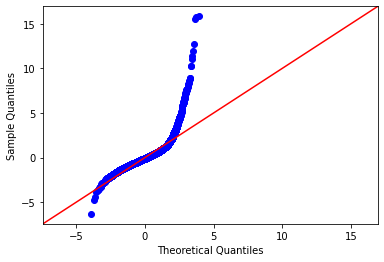

In [997]:
fig = sm.graphics.qqplot(numeric_model.resid, dist=stats.norm, line='45', fit=True)

So, this looks ok but there are problems as the quantiles increase too dramatically and skew the line. This is sort of similar to the fat tails of the sqft_living histogram from earlier. Log transforming might help it out. But, let's look at the categorical values first.

## One Hot Encoding categories

In [998]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [999]:
new_grades = {'3 Poor':3, '4 Low':4, '5 Fair':5, '6 Low Average':6, '7 Average': 7, '8 Good': 8, '9 Better': 9, 
             '10 Very Good':10, '11 Excellent':11, '12 Luxury':12, '13 Mansion':13}
df['grade'].replace(new_grades, inplace=True)

In [1000]:
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7
2,180000.0,2,1.00,770,1.0,Average,0.0,2,6
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8


In [1001]:
from sklearn.preprocessing import OneHotEncoder
Conditions = df[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(Conditions)
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [1002]:
Conditions_encoded = ohe.transform(Conditions)
Conditions_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [1003]:
Conditions_encoded = pd.DataFrame(Conditions_encoded, columns=ohe.categories_[0], index=df.index)
Conditions_encoded

,Average,Fair,Good,Poor,Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21592,1.0,0.0,0.0,0.0,0.0
21593,1.0,0.0,0.0,0.0,0.0
21594,1.0,0.0,0.0,0.0,0.0
21595,1.0,0.0,0.0,0.0,0.0


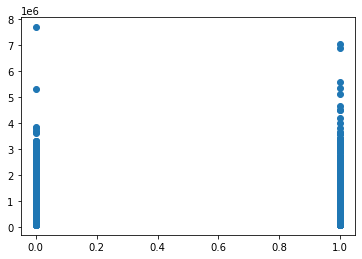

In [1004]:
plt.scatter(Conditions_encoded.Average, df.price)

In [1005]:
Month = df[['Month']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(Month)
ohe.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)]

In [1006]:
Month_encoded = ohe.transform(Month)
Month_encoded 

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [1007]:
Month_encoded = pd.DataFrame(Month_encoded, columns=ohe.categories_[0], index=df.index)
Month_encoded

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1008]:
Month_encoded.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                        'September', 'October', 'November','December']
Month_encoded

,January,February,March,April,May,June,July,August,September,October,November,December
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


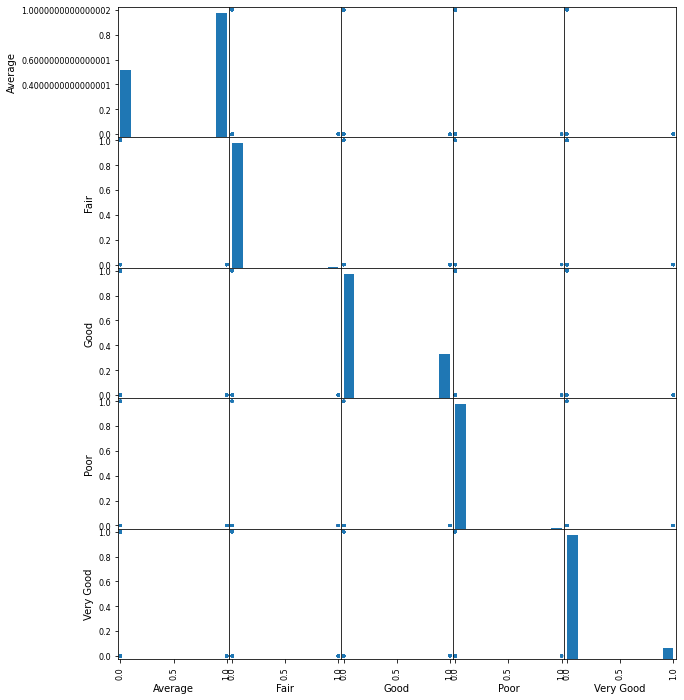

In [1009]:
pd.plotting.scatter_matrix(Conditions_encoded[Conditions_encoded.columns], figsize=(10,12));

Creating a Completed Renovations Column and a Recent renovations Column:

In [1010]:
df['Completed_renovation']=df['yr_renovated'] > 1


In [1011]:
df['Recent_Renovation']=df['yr_renovated'] > 2004.0

In [1012]:
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade,Completed_renovation,Recent_Renovation
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7,False,False
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7,True,False
2,180000.0,2,1.00,770,1.0,Average,0.0,2,6,False,False
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7,False,False
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8,False,False
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8,False,False
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8,False,False
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7,False,False
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8,False,False


In [1013]:
Finished_Reno = df[['Completed_renovation']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(Finished_Reno)
ohe.categories_

[array([False,  True])]

In [1014]:
Finished_Reno_encoded = ohe.transform(Finished_Reno)
Finished_Reno_encoded 

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [1015]:
Finished_Reno_encoded = pd.DataFrame(Finished_Reno_encoded, columns=ohe.categories_[0], index=df.index)
Finished_Reno_encoded.columns=['Not_Renovated', 'Renovated']
Finished_Reno_encoded

,Not_Renovated,Renovated
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
21592,1.0,0.0
21593,1.0,0.0
21594,1.0,0.0
21595,1.0,0.0


In [1016]:
Recent_Reno = df[['Recent_Renovation']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(Recent_Reno)
ohe.categories_

[array([False,  True])]

In [1017]:
Recent_Reno_encoded = ohe.transform(Recent_Reno)
Recent_Reno_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [1018]:
Recent_Reno_encoded = pd.DataFrame(Recent_Reno_encoded, columns=ohe.categories_[0], index=df.index)
Recent_Reno_encoded.columns=['Not_Renovated Recently', 'Renovated Recently']
Recent_Reno_encoded

,Not_Renovated Recently,Renovated Recently
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
21592,1.0,0.0
21593,1.0,0.0
21594,1.0,0.0
21595,1.0,0.0


Combining numerical features:

In [1019]:
month_and_cond= pd.concat((Month_encoded, Conditions_encoded, Recent_Reno_encoded, Finished_Reno_encoded), axis=1)
month_and_cond

,January,February,March,April,May,June,July,August,September,October,...,December,Average,Fair,Good,Poor,Very Good,Not_Renovated Recently,Renovated Recently,Not_Renovated,Renovated
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21593,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21595,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [1020]:
df= pd.concat((df,month_and_cond), axis=1)
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade,Completed_renovation,...,December,Average,Fair,Good,Poor,Very Good,Not_Renovated Recently,Renovated Recently,Not_Renovated,Renovated
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7,True,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,180000.0,2,1.00,770,1.0,Average,0.0,2,6,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7,False,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


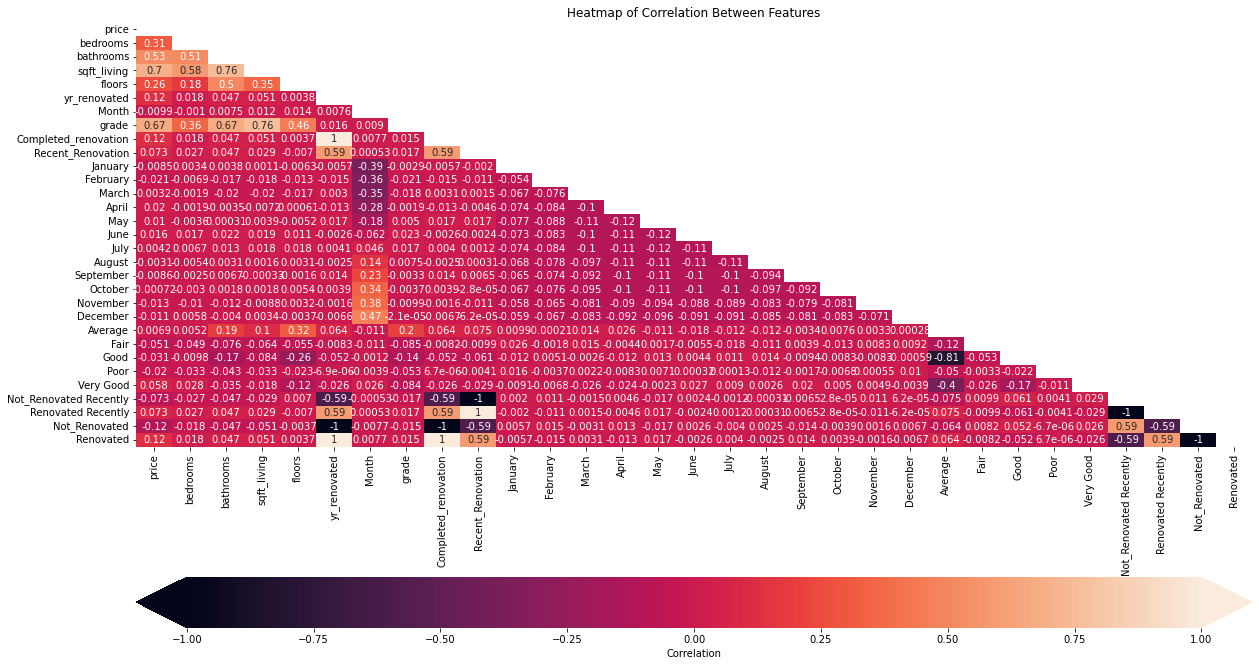

In [1021]:
df_corr_2 = df.corr()

fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(
    data=df_corr_2,
    mask=np.triu(np.ones_like(df_corr_2, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)
ax.set_title("Heatmap of Correlation Between Features");

Some of the correlations are on the Boolean columns will probably create noise in any model.

In [1022]:
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_renovated,Month,grade,Completed_renovation,...,December,Average,Fair,Good,Poor,Very Good,Not_Renovated Recently,Renovated Recently,Not_Renovated,Renovated
0,221900.0,3,1.00,1180,1.0,Average,0.0,10,7,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,538000.0,3,2.25,2570,2.0,Average,1991.0,12,7,True,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,180000.0,2,1.00,770,1.0,Average,0.0,2,6,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,604000.0,4,3.00,1960,1.0,Very Good,0.0,12,7,False,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,510000.0,3,2.00,1680,1.0,Average,0.0,2,8,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,Average,0.0,5,8,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21593,400000.0,4,2.50,2310,2.0,Average,0.0,2,8,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21594,402101.0,2,0.75,1020,2.0,Average,0.0,6,7,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21595,400000.0,3,2.50,1600,2.0,Average,0.0,1,8,False,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


On to the model:

In [1023]:
df= df.drop(['condition','Completed_renovation', 'Recent_Renovation'], axis=1)

In [1024]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   21597 non-null  float64
 1   bedrooms                21597 non-null  int64  
 2   bathrooms               21597 non-null  float64
 3   sqft_living             21597 non-null  int64  
 4   floors                  21597 non-null  float64
 5   yr_renovated            21597 non-null  float64
 6   Month                   21597 non-null  int64  
 7   grade                   21597 non-null  int64  
 8   January                 21597 non-null  float64
 9   February                21597 non-null  float64
 10  March                   21597 non-null  float64
 11  April                   21597 non-null  float64
 12  May                     21597 non-null  float64
 13  June                    21597 non-null  float64
 14  July                    21597 non-null

In [1025]:
X_model_4= df.drop('price', axis=1)
y_model_4= df['price']

In [1026]:
X_model_4= sm.add_constant(X_model_4)
Fourth_model=sm.OLS(endog=y_model_4, exog=X_model_4).fit()

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1027]:
Fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     1242.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        13:02:34   Log-Likelihood:            -2.9828e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21573   BIC:                         5.968e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.595e+06   3.07e+05     -5.193      0.000    -2.2e+06   -9.93e+05
bedrooms               -4.305e+04   2247.409    -19.158      0.000   -4.75e+04   -3.86e+04
bathrooms              -1.356e+04   3631.989     -3.733      0.000   -2.07e+04   -6440.477
sqft_living              212.7252      3.544     60.016      0.000     205.778     219.673
floors                 -1.663e+04   3752.016     -4.433      0.000    -2.4e+04   -9279.393
yr_renovated            3707.6403    787.462      4.708      0.000    2164.156    5251.124
Month                  -7.388e+04   1.39e+04     -5.327      0.000   -1.01e+05   -4.67e+04
grade                     1.1e+05   2344.069     46.938      0.000    1.05e+05    1.15e+05
January                -5.477e+05   1.02e+05     -5.368      0.000   -7.48e+05   -3.48e+05
February               -4.698e+05   8.82e+04     -5.328      0.000   -6.43e+05   -2.97e+05
March                  -3.641e+05   7.42e+04     -4.906      0.000    -5.1e+05   -2.19e+05
April                  -2.841e+05   6.04e+04     -4.702      0.000   -4.03e+05   -1.66e+05
May                    -2.391e+05   4.67e+04     -5.123      0.000   -3.31e+05   -1.48e+05
June                   -1.708e+05   3.28e+04     -5.200      0.000   -2.35e+05   -1.06e+05
July                   -1.075e+05   1.94e+04     -5.547      0.000   -1.45e+05   -6.95e+04
August                 -2.992e+04   7097.995     -4.215      0.000   -4.38e+04    -1.6e+04
September               4.037e+04   1.05e+04      3.842      0.000    1.98e+04     6.1e+04
October                 1.267e+05   2.36e+04      5.378      0.000    8.05e+04    1.73e+05
November                1.928e+05   3.72e+04      5.184      0.000     1.2e+05    2.66e+05
December                2.585e+05   5.09e+04      5.080      0.000    1.59e+05    3.58e+05
Average                -4.014e+05   6.22e+04     -6.458      0.000   -5.23e+05    -2.8e+05
Fair                   -3.533e+05   6.37e+04     -5.548      0.000   -4.78e+05   -2.29e+05
Good                   -3.362e+05   6.21e+04     -5.417      0.000   -4.58e+05   -2.15e+05
Poor                   -2.582e+05   7.17e+04     -3.599      0.000   -3.99e+05   -1.18e+05
Very Good              -2.453e+05   6.21e+04     -3.948      0.000   -3.67e+05   -1.24e+05
Not_Renovated Recently -7.725e+05   1.45e+05     -5.331      0.000   -1.06e+06   -4.88e+05
Renovated Recently      -8.22e+05   1.63e+05     -5.053      0.000   -1.14e+06   -5.03e+05
Not_Renovated           2.797e+06   6.29e+05      4.446      0.000    1.56e+06    4.03e+06
Renovated              -4.392e+06   9.36e+05     -4.691      0.000   -6.23e+06   -2.56e+06
==============================================================================
Omnibus:                    16634.219   Durbin-Watson:                   1.990
Prob(Omnibus)

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


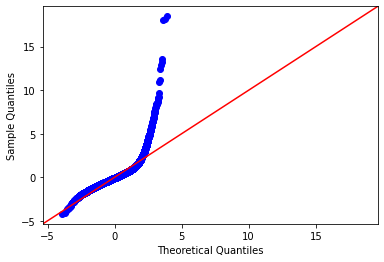

In [1028]:
residuals = Fourth_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45',)
plt.show()

Again, this model violates the assumption of normality of errors so we need to do a few things to change the data. First, let's drop some boolean and redundant columns.

In [1029]:
#drop not recently renovated, not renovated, Month
df= df.drop(['Not_Renovated Recently', 'Not_Renovated', 'Month'], axis=1)

In [1030]:
df

,price,bedrooms,bathrooms,sqft_living,floors,yr_renovated,grade,January,February,March,...,October,November,December,Average,Fair,Good,Poor,Very Good,Renovated Recently,Renovated
0,221900.0,3,1.00,1180,1.0,0.0,7,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,2.0,1991.0,7,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,180000.0,2,1.00,770,1.0,0.0,6,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,1.0,0.0,7,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,510000.0,3,2.00,1680,1.0,0.0,8,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,0.0,8,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,4,2.50,2310,2.0,0.0,8,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,2,0.75,1020,2.0,0.0,7,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,3,2.50,1600,2.0,0.0,8,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1031]:
X_model_5= df.drop('price', axis=1)
y_model_5= df['price']

In [1032]:
X_model_5= sm.add_constant(X_model_5)
Fifth_model=sm.OLS(endog=y_model_5, exog=X_model_5).fit()

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1033]:
Fifth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     1242.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        13:02:35   Log-Likelihood:            -2.9828e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21573   BIC:                         5.968e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.908e+05   1.32e+04    -29.591      0.000   -4.17e+05   -3.65e+05
bedrooms           -4.305e+04   2247.409    -19.158      0.000   -4.75e+04   -3.86e+04
bathrooms          -1.356e+04   3631.989     -3.733      0.000   -2.07e+04   -6440.477
sqft_living          212.7252      3.544     60.016      0.000     205.778     219.673
floors             -1.663e+04   3752.016     -4.433      0.000    -2.4e+04   -9279.393
yr_renovated        3707.6403    787.462      4.708      0.000    2164.156    5251.124
grade                 1.1e+05   2344.069     46.938      0.000    1.05e+05    1.15e+05
January            -4.107e+04   7328.167     -5.604      0.000   -5.54e+04   -2.67e+04
February           -3.701e+04   6556.983     -5.644      0.000   -4.99e+04   -2.42e+04
March              -5258.1896   5466.352     -0.962      0.336    -1.6e+04    5456.264
April                892.5514   5084.056      0.176      0.861   -9072.574    1.09e+04
May                -2.797e+04   4905.965     -5.701      0.000   -3.76e+04   -1.84e+04
June               -3.353e+04   5149.683     -6.511      0.000   -4.36e+04   -2.34e+04
July                -4.41e+04   5106.588     -8.636      0.000   -5.41e+04   -3.41e+04
August             -4.043e+04   5405.426     -7.479      0.000    -5.1e+04   -2.98e+04
September          -4.401e+04   5604.592     -7.853      0.000    -5.5e+04    -3.3e+04
October            -3.156e+04   5466.775     -5.772      0.000   -4.23e+04   -2.08e+04
November            -3.93e+04   6201.602     -6.338      0.000   -5.15e+04   -2.71e+04
December           -4.749e+04   6086.226     -7.802      0.000   -5.94e+04   -3.56e+04
Average            -1.607e+05   9076.636    -17.704      0.000   -1.78e+05   -1.43e+05
Fair               -1.126e+05   1.73e+04     -6.521      0.000   -1.46e+05   -7.87e+04
Good                -9.55e+04   9106.462    -10.487      0.000   -1.13e+05   -7.77e+04
Poor               -1.744e+04   3.74e+04     -0.467      0.641   -9.07e+04    5.58e+04
Very Good          -4600.8581   9903.028     -0.465      0.642    -2.4e+04    1.48e+04
Renovated Recently -4.954e+04   2.56e+04     -1.936      0.053   -9.97e+04     622.763
Renovated           -7.19e+06   1.57e+06     -4.593      0.000   -1.03e+07   -4.12e+06
==============================================================================
Omnibus:                    16634.219   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           964690.215
Skew:                           3.209   Prob(JB):                         0.00
Kurtosis:                      35.107   Cond. No.                     3.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correct

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


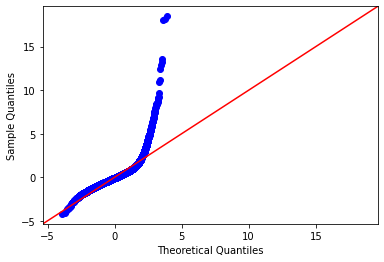

In [1034]:
residuals = Fifth_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45',)
plt.show()

Again, the assumption of normality is violated. The solution may lie in log transforming.

### Log transforming

In [1035]:
continuous = ['sqft_living', 'price']
df_conti= df[continuous] 
log_names = [f'{column}_log' for column in df_conti.columns]
df_log = np.log(df_conti)
df_log.columns = log_names
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

In [1036]:
df_log_normal = pd.concat([df_log_norm,df], axis=1)                           

In [1037]:
X_log= df_log_normal.drop(['price', 'price_log','bathrooms','sqft_living', 'Renovated', 'Average', 'Poor', 'Fair',
                           'Good', 'Very Good'], axis=1)
y_log= df_log_normal['price_log']


In [1038]:
X_log = sm.add_constant(X_log)
log_model=sm.OLS(endog=y_log, exog=X_log).fit()

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1039]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     1601.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        13:02:36   Log-Likelihood:                -21833.
No. Observations:               21597   AIC:                         4.370e+04
Df Residuals:                   21579   BIC:                         4.385e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.5342      0.050    -50.841      0.000      -2.632      -2.436
sqft_living_log        0.3725      0.008     45.081      0.000       0.356       0.389
bedrooms              -0.0510      0.006     -7.998      0.000      -0.063      -0.038
floors                -0.0492      0.009     -5.204      0.000      -0.068      -0.031
yr_renovated           0.0002   1.55e-05     13.887      0.000       0.000       0.000
grade                  0.3875      0.006     62.933      0.000       0.375       0.400
January               -0.2673      0.020    -13.059      0.000      -0.307      -0.227
February              -0.2380      0.018    -13.004      0.000      -0.274      -0.202
March                 -0.1508      0.015     -9.821      0.000      -0.181      -0.121
April                 -0.1006      0.014     -7.039      0.000      -0.129      -0.073
May                   -0.1822      0.014    -13.157      0.000      -0.209      -0.155
June                  -0.1941      0.014    -13.410      0.000      -0.223      -0.166
July                  -0.2239      0.014    -15.616      0.000      -0.252      -0.196
August                -0.2270      0.015    -15.002      0.000      -0.257      -0.197
September             -0.2288      0.016    -14.573      0.000      -0.260      -0.198
October               -0.2163      0.015    -14.119      0.000      -0.246      -0.186
November              -0.2406      0.017    -13.863      0.000      -0.275      -0.207
December              -0.2645      0.017    -15.523      0.000      -0.298      -0.231
Renovated Recently     0.0731      0.051      1.428      0.153      -0.027       0.173
==============================================================================
Omnibus:                       81.303   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.949
Skew:                           0.148   Prob(JB):                     1.60e-18
Kurtosis:                       2.937   Cond. No.                     2.28e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.72e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\isaia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


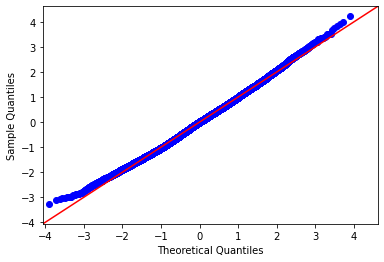

In [1040]:
resid = log_model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

In [1041]:

import statsmodels.stats.api as sms
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(log_model.resid)
list(zip(name, test))

[('Jarque-Bera', 81.94898639194479),
 ('Prob', 1.6032590726147647e-18),
 ('Skew', 0.1476112765272201),
 ('Kurtosis', 2.9374642366512265)]

So, this looks alot better. Now, we have a much better fit. Also, the skewness and kurtosis have decreased to acceptable numbers. Now let's look at the scedasticity of 'sqft_living_log'.

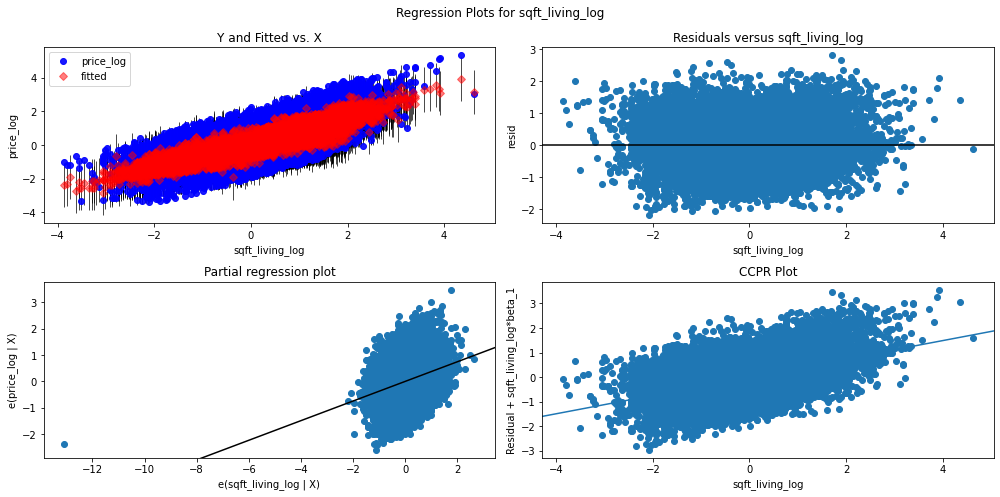

In [1042]:
sm.graphics.plot_regress_exog(log_model, 'sqft_living_log', fig=plt.figure(figsize=(14,7)));

## Calculations for Square Footage, Grade, and Renovation.

For a 5% increase in square footage:

In [1043]:
1.05 ** .3735

1.0183901806917963

1 unit change in grade:

In [1044]:
.3875 *100#(to account for log transforming)

38.75

Recently Renovated:

In [1045]:
.0731 *100#(to account for log transforming)

7.31

## Recommendations

1. Improving the square footage by 5% leads to an increase in price of 2%.

2. Improving the grade by 1 unit will increase price by 39%.

3. Recently Renovated homes sell for 7% more.

In [1046]:
1.05 ** .3735

1.0183901806917963

Overall, it looks good but there are certainly some concerns. First, the model may be overfitted as it hues very closely to the line for most of its duration. Another concern is the R-squared value although the R-squared value is a reflection is of the fact that the model does not contain many important features like zip code, waterfront, and view. Even so, those factors should be excluded because an existing homeowner cannot change them.

We also should be weary of generalizing too much with this data since it is from a very unique real estate market where prices have continued to rise over the last few decades. Comparing the Seattle area with other areas of comparable size may not work since Seattle is home to so much wealth. However, for homeowners in this area, the results are very valuable and can lead to greater potential profits.